# Avacado Project

# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

# Import necessary Python Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor


import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


import pickle
import warnings
warnings.filterwarnings('ignore')

# DATA EXPLORATION

In [2]:
#Read in the Avocado Prices csv file as a DataFrame called df

In [3]:
#loading the data set
df = pd.read_csv('avocado.csv')
#print first 5 rows of the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Understanding the Avocado Dataset

In [4]:
#Data Summary
df.shape

(18249, 14)

Dataset has 18249 rows and 14 columns.

In [5]:
#checking for duplicates
df.duplicated().sum()

0

In [6]:
#checing datatypes of each column
df.dtypes.sort_values(ascending=False)

Date             object
type             object
region           object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
Unnamed: 0        int64
year              int64
dtype: object

In [7]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of Unnamed: 0 

0     432
3     432
11    432
10    432
9     432
8     432
6     432
5     432
4     432
7     432
2     432
1     432
34    324
28    324
41    324
48    324
26    324
42    324
32    324
27    324
43    324
12    324
44    324
13    324
29    324
45    324
14    324
30    324
46    324
15    324
31    324
25    324
40    324
50    324
37    324
18    324
19    324
35    324
20    324
36    324
49    324
24    324
21    324
33    324
22    324
38    324
16    324
23    324
39    324
17    324
47    324
51    322
52    107
Name: Unnamed: 0, dtype: int64
*******************************************************
*******************************************************
Value counts of Date 

2015-08-23    108
2017-12-24    108
2017-10-22    108
2015-08-30    108
2016-10-02    108
             ... 
2018-03-11    108
2017-07-02    108
2017-06-18    107
2015-12-06    107
2017-06-25    107
Name: Date, Length: 1

# OBSERVATIONS OF THE DATASET (FROM VALUE COUNTS)

# DROPPING THE COLUMNS

In [8]:
df=df.drop(columns = ['Unnamed: 0'])

In [9]:
#Data Summary
df.shape

(18249, 13)

In [10]:
df.info() 
# This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [12]:
#We have now added a feature Month & Day, so we now do not need the feature Date as Day, Month & Year already have been sepearted.

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

# Let's see how Average price is distributed over the months for Conventional and Organic Types.

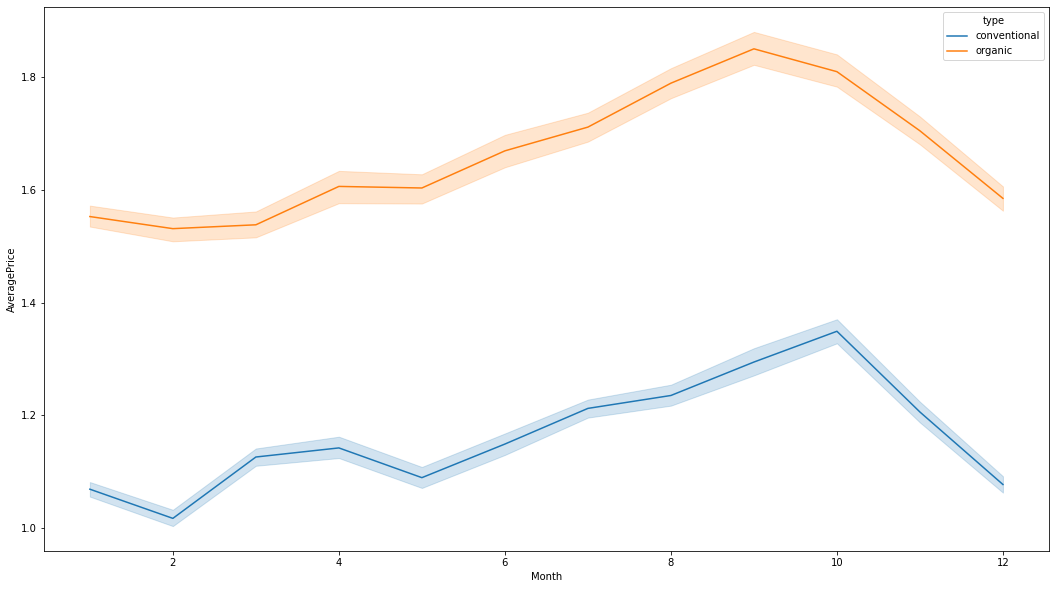

In [14]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

In [15]:
#Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

# Now lets plot Average price distribution based on region

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

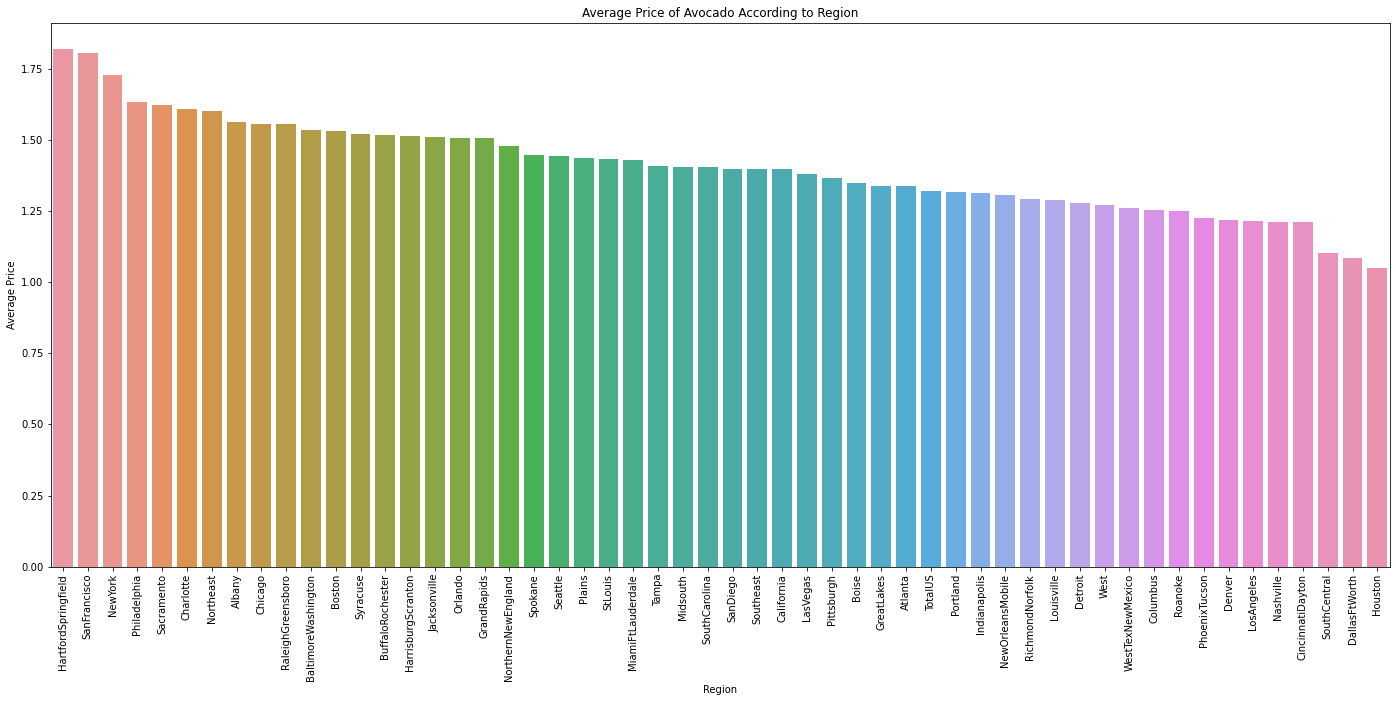

In [16]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

# TOP 5 regions where Average consumption is very high

Text(0, 0.5, 'Average of Total Volume')

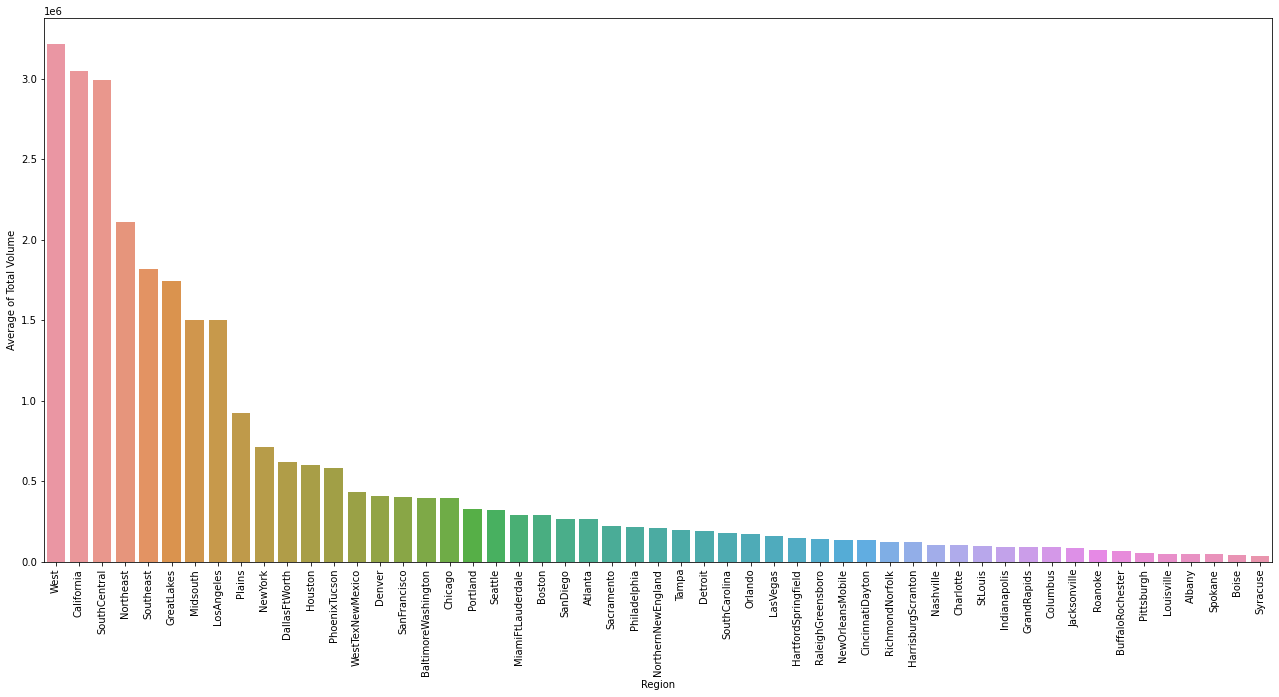

In [17]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')

# Year and the region for which the Average price was the highest

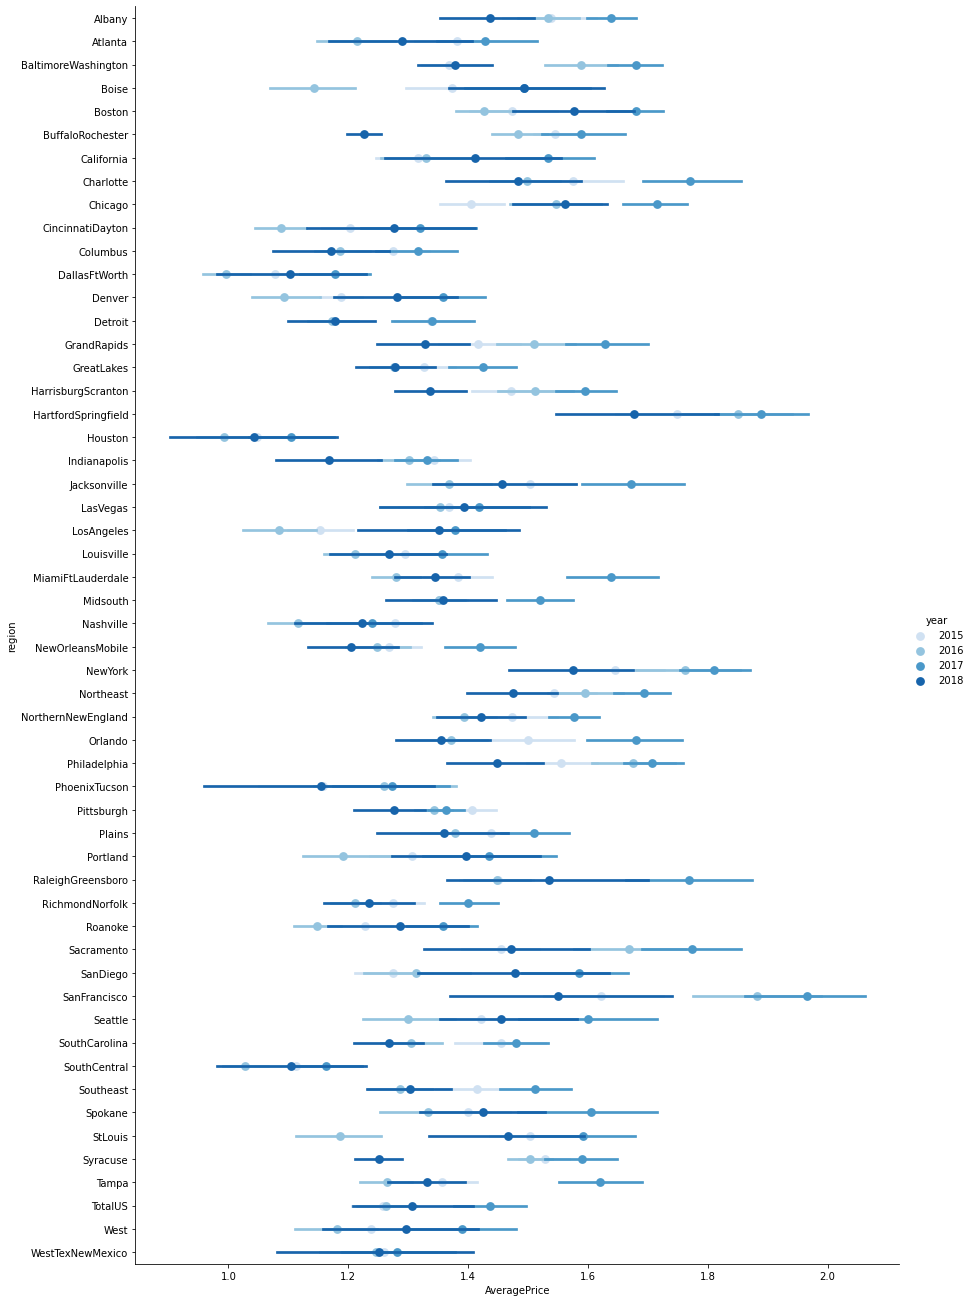

In [18]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

# Let's see how price is distributed over the date column

Text(0.5, 1.0, 'Average Price')

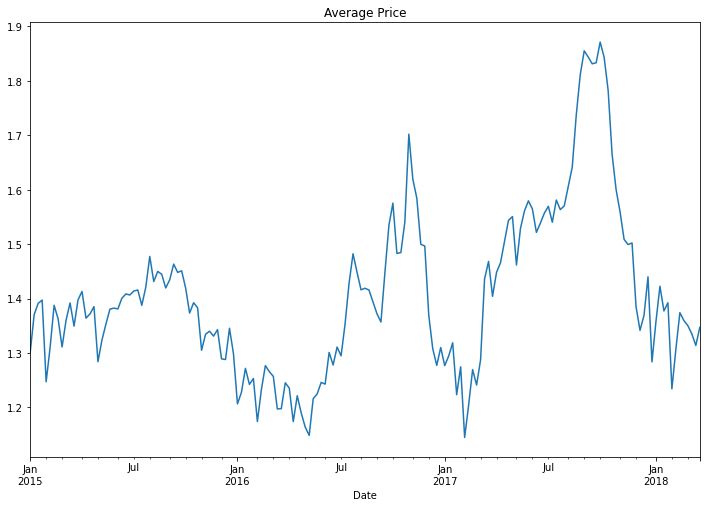

In [19]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

conventional    9126
organic         9123
Name: type, dtype: int64

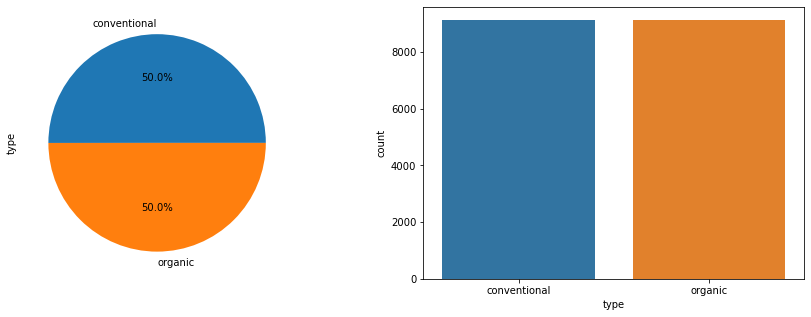

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

These two types organic and conventional are almost equal and balanced.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

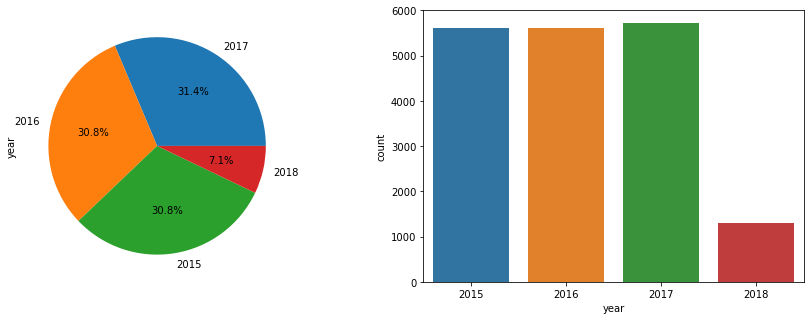

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

Total number of regions 54


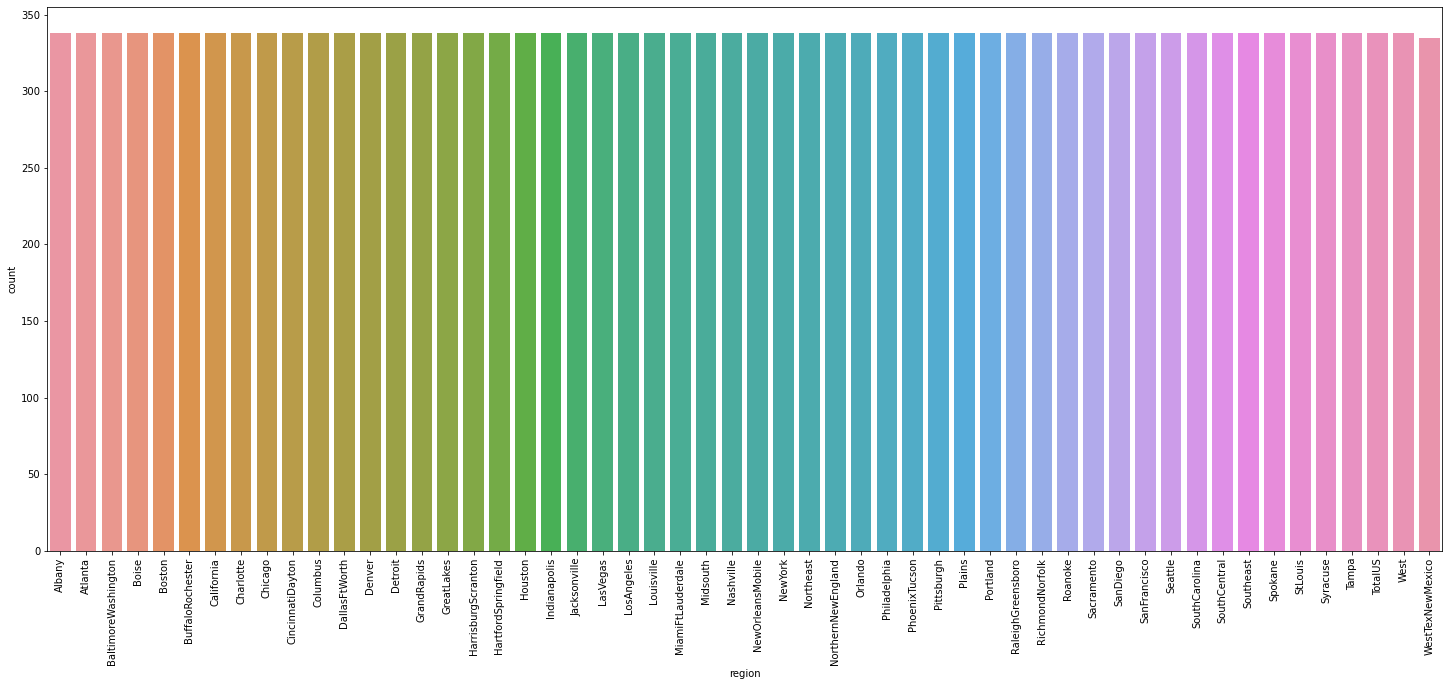

In [22]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total number of regions',df['region'].nunique())

There are 54 regions in total. All the region produces almost equal amounts of avocados except for west tex new mexico which has slightly less number.

<AxesSubplot:xlabel='year', ylabel='region'>

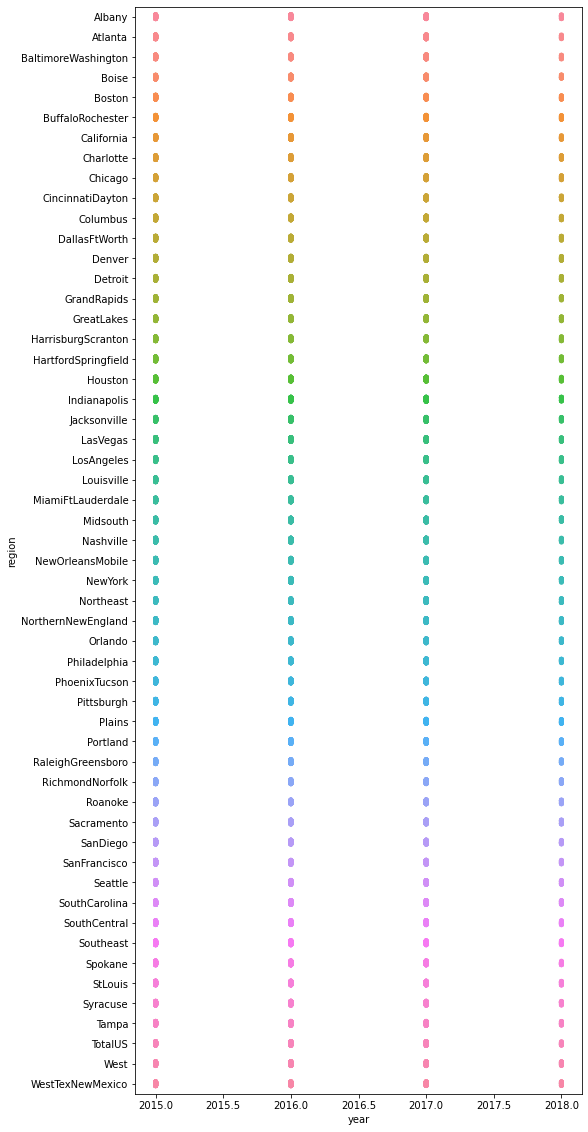

In [23]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year',y='region',data=df)

Avocados are collected from all the regions irrespective of the year. For each year avocados are collected from all the same regions.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

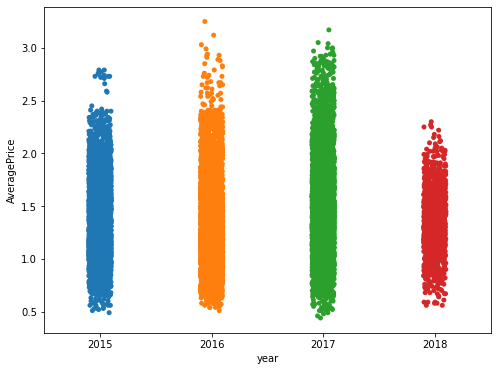

In [24]:
plt.figure(figsize=(8,6))
sns.stripplot(x='year',y='AveragePrice',data=df)

Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018 which is an exception.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

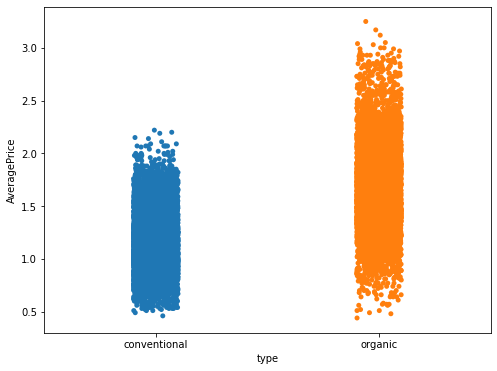

In [25]:
plt.figure(figsize=(8,6))
sns.stripplot(x='type',y='AveragePrice',data=df)

Organic Avacoados are more expensive than the conventional ones.

In [26]:
#Dropping Date, as the Day, Month & Year have been seperately termed as a feature.

In [27]:
df.drop('Date',axis=1,inplace=True)

In [28]:
#We replace 2015 by 1 and 2016 by 2 and so on... for more simplicity
df['year'].replace(2015,1,inplace=True)
df['year'].replace(2016,2,inplace=True)
df['year'].replace(2017,3,inplace=True)
df['year'].replace(2018,4,inplace=True)

In [29]:
#we create a time column using year,month and day column and then drop these 3.
df['Time']=(df['year']*365)+(df['Month']*30)+(df['Day'])
df.drop(['year','Month','Day'],axis=1,inplace=True)

In [30]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,724
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,1524
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,1518
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,1511
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,1504


# ENCODING

In [31]:
# encoding the object data type features into integer data types.

In [32]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

In [33]:
df['region']=o.fit_transform(df['region'].values.reshape(-1,1))
df['type']=o.fit_transform(df['type'].values.reshape(-1,1))

In [34]:
df.rename(columns={'Total Volume': 'TotalVolume', '4046': 'f4046', '4225': 'f4225','4770': 'f4770', '4046': 'f4046','Total Bags': 'TotalBags', 'Small Bags': 'SmallBags', 'XLarge Bags': 'XLargeBags'}, inplace=True)

In [35]:
df

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,724
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,1524
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,1518
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,1511
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,1504


In [36]:
#checking the datatypes post encoding
df.dtypes

AveragePrice    float64
TotalVolume     float64
f4046           float64
f4225           float64
f4770           float64
TotalBags       float64
SmallBags       float64
Large Bags      float64
XLargeBags      float64
type            float64
region          float64
Time              int64
dtype: object

In [37]:
#encoding might have created a few duplicate columns
df.duplicated().sum()

0

In [38]:
df.describe()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,26.495644,984.962025
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,15.583788,340.861886
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,399.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,13.000000,690.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,26.000000,984.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,40.000000,1279.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,53.000000,1575.000000


In [39]:
#Let's check the correlation between the features and label
df.corr()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.145024
TotalVolume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,0.009374
f4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,-0.004912
f4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.016817
f4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.047397
TotalBags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,0.064821
SmallBags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,0.057037
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,0.081969
XLargeBags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281,0.077534
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,-0.000059


<AxesSubplot:>

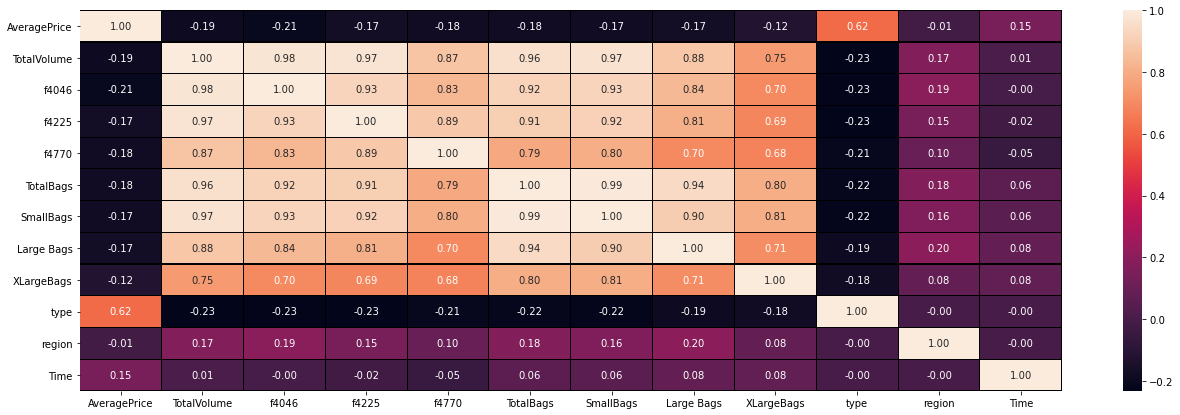

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [41]:
#There is not much correlation between the target "AveragePrice" and Features
#There is high correlation (Mulicollinearity) between TotalVolumne, 4046, 4225, 4770, TotalBags, SmallBags, LargeBags, XlargeBags

#We will treat multicollinearity with regularisation 

# REGRESSION TASK = FIND AVERAGEPRICE

In [42]:
#backup the dataset
df2 = df #regression
df3 = df #classification

# DIVIDE DATA INTO FEATURES & LABEL (REGRESSION)

In [43]:
#diving the columns in feature and label
X = df2.drop(columns=['AveragePrice'])
y = df2['AveragePrice']

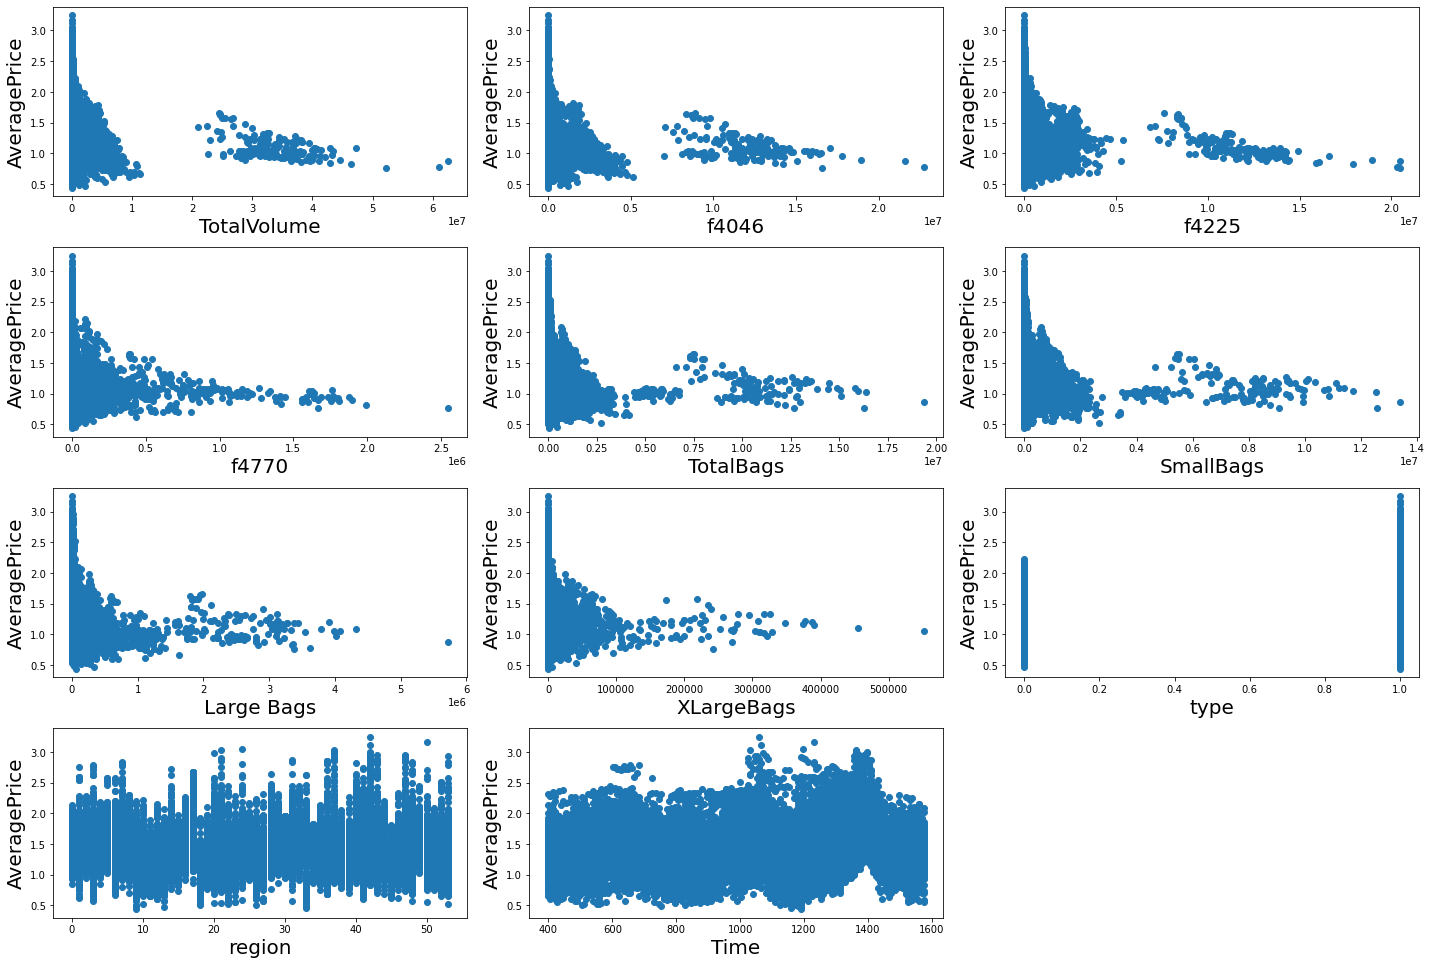

In [44]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice', fontsize=20)
    plotnumber+=1
plt.tight_layout()

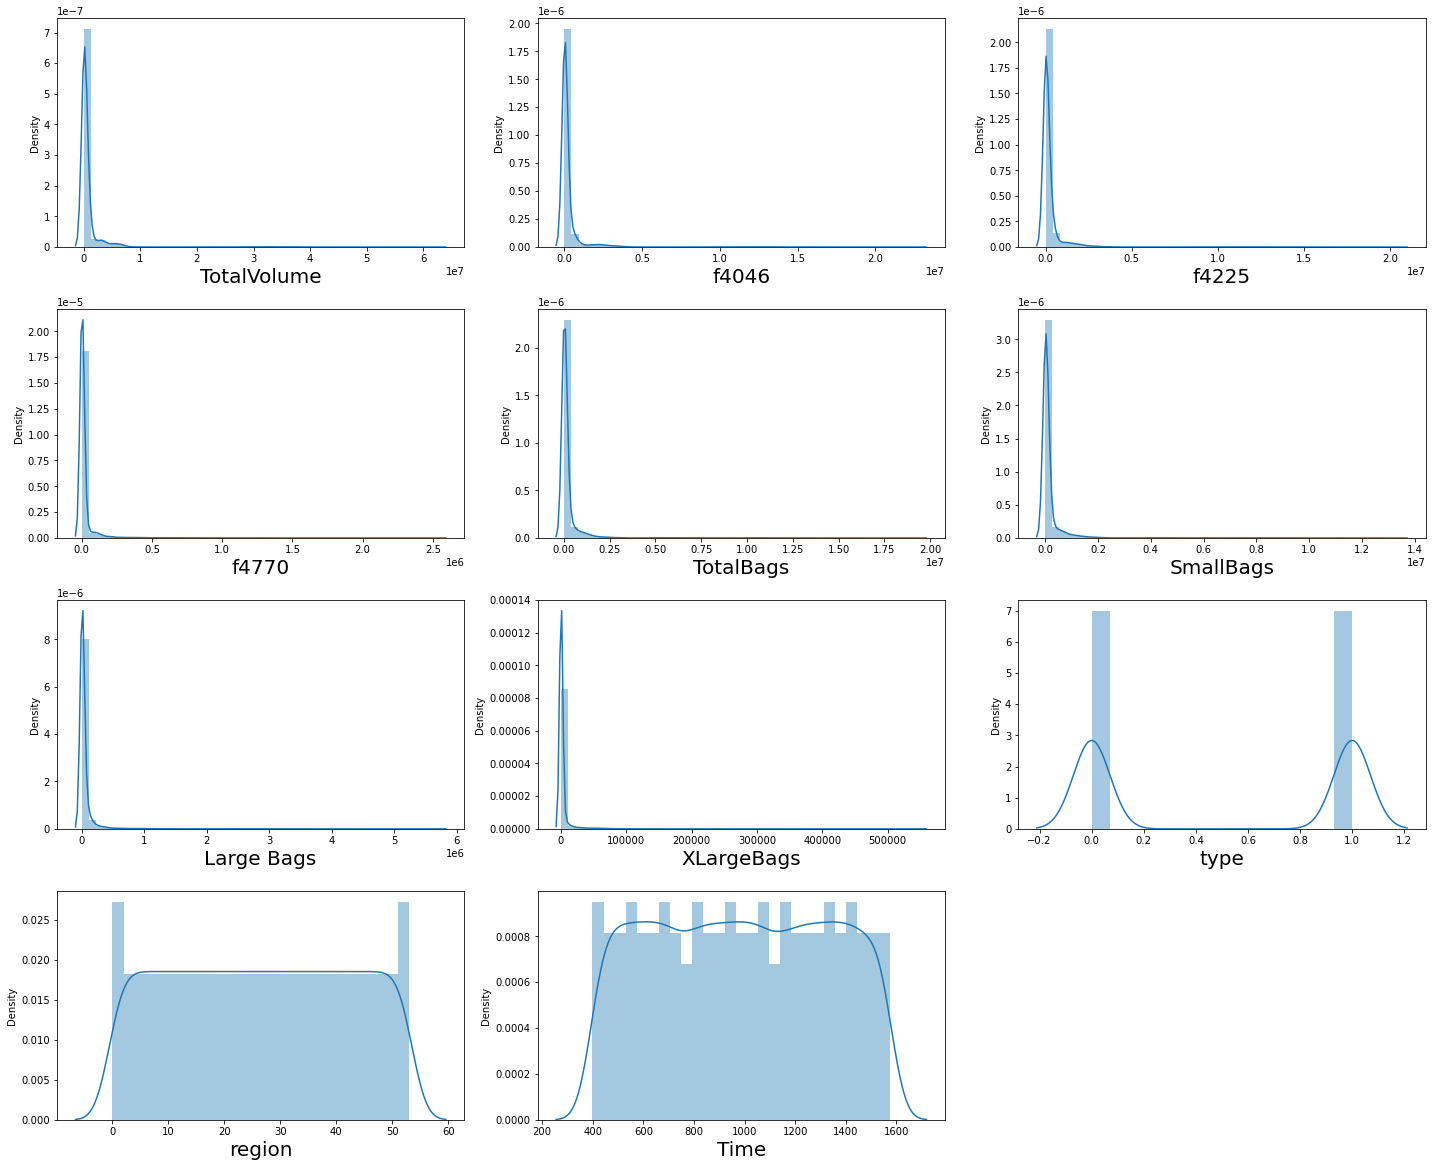

In [45]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET

In [46]:
#Checking skewness of the features
df2.skew().sort_values(ascending=False)

XLargeBags      13.139751
f4770           10.159396
Large Bags       9.796455
TotalBags        9.756072
SmallBags        9.540660
TotalVolume      9.007687
f4225            8.942466
f4046            8.648220
AveragePrice     0.580303
Time             0.003328
type             0.000329
region           0.000030
dtype: float64

In [47]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
df2_new = power_transform(df2)
df2=pd.DataFrame(df2_new,columns=df2.columns)
df2.skew().sort_values(ascending=False) #validating that the skewness is removed

XLargeBags      0.793520
f4770           0.032184
TotalVolume     0.011171
SmallBags       0.007058
AveragePrice    0.005596
type            0.000329
TotalBags      -0.001626
f4225          -0.017740
f4046          -0.022679
Large Bags     -0.073809
Time           -0.113117
region         -0.261443
dtype: float64

In [48]:
df2['AveragePrice'] = df['AveragePrice'] #giving back the original values of target column

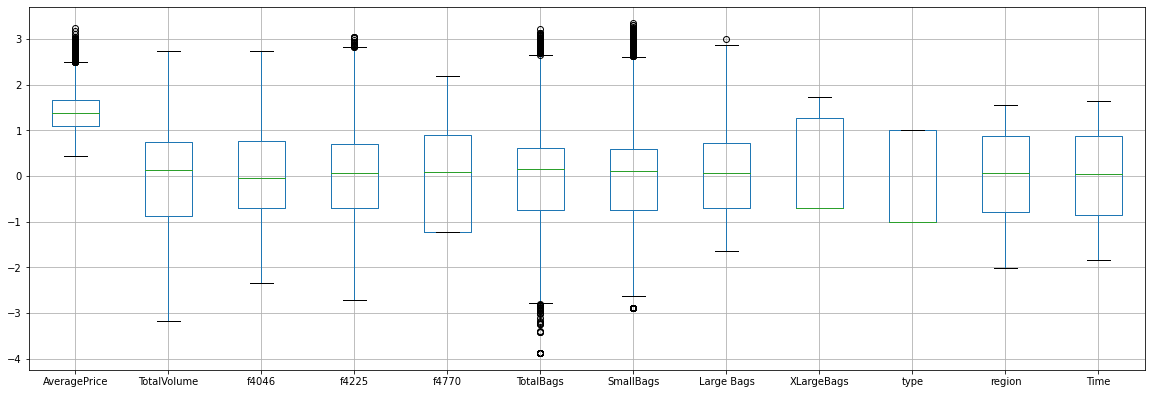

In [49]:
#Visualizing the outliers using BOXPLOT
df2.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [50]:
#There are outliers in 4225 (higher quantile) , Total Bags (Both) , Small Bags (Higher Quantile)
#We will use Z score method to remove these outliers

In [51]:
# removing outliers using z score
from scipy.stats import zscore
z=np.abs(zscore(df2))
z.shape

threshold=3
print(np.where(z>3))

df2_new=df2[(z<3).all(axis=1)]

df2_new.shape

(array([ 2699,  5462,  5475,  5476,  5477,  5478,  5479,  5480,  5481,
        5482,  5483,  5484,  5485,  5486,  5487,  5488,  5489,  5490,
        5491,  5492,  5493,  5494,  5495,  5496,  5497,  5506,  5506,
        8319,  8322,  8344,  8344,  8345,  8345,  8346,  8346,  8347,
        8347,  8348,  8348,  8349,  8349,  8350,  8351,  8352,  8352,
        8353,  8353,  8354,  8354,  8355,  8356,  8357,  8358,  8359,
        8360,  8361,  8362,  8363,  8364,  8365,  8365,  8366,  8366,
        8366,  8367,  8367,  8368,  8369,  8370,  8371,  9090,  9090,
        9091,  9091,  9092,  9092,  9093,  9093,  9094,  9094,  9095,
        9096,  9096,  9097,  9097,  9097,  9097,  9098,  9098,  9099,
        9099,  9100,  9101,  9212,  9894, 10381, 11024, 11320, 11320,
       11321, 11321, 11322, 11323, 11324, 11325, 11325, 11326, 11326,
       11327, 11328, 11329, 11330, 11331, 11332, 11332, 11333, 11336,
       11338, 11340, 11342, 11347, 11348, 11349, 11350, 11354, 11387,
       11388, 11594

(18025, 12)

In [52]:
df2 = df2_new

In [53]:
#loss of data

print(((18249-18025)/18249)*100)

1.2274645186037592


In [54]:
#Hence, 1.1% loss of data which is 199 entries

In [55]:
#diving the columns in feature (X) and label (y)
X = df2.drop(columns=['AveragePrice'])
y = df2['AveragePrice']

In [56]:
#Data Scaling
scaler = StandardScaler()

In [57]:
xd=scaler.fit_transform(X)
X=pd.DataFrame(xd,columns=X.columns)

In [58]:
#Finding best random_state
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred_train=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,y_pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,y_pred)}")
    print("\n")

At random state 0,the training accuracy is:- 0.558445620626288
At random state 0,the testing accuracy is:- 0.5321987887145034


At random state 1,the training accuracy is:- 0.5506538148338039
At random state 1,the testing accuracy is:- 0.5638273645006764


At random state 2,the training accuracy is:- 0.5574001049857087
At random state 2,the testing accuracy is:- 0.5371204418583138


At random state 3,the training accuracy is:- 0.5549521562492713
At random state 3,the testing accuracy is:- 0.5472752347403227


At random state 4,the training accuracy is:- 0.5519398373289106
At random state 4,the testing accuracy is:- 0.5584797540961483


At random state 5,the training accuracy is:- 0.5536721656825991
At random state 5,the testing accuracy is:- 0.5521875031057966


At random state 6,the training accuracy is:- 0.5523156519679935
At random state 6,the testing accuracy is:- 0.5573925710200989


At random state 7,the training accuracy is:- 0.5527518215513659
At random state 7,the testing accu

In [59]:
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [60]:
model_name=[]
r2_scores=[]
rmse_value=[]

# Building Machine Learning Models

In [61]:
#Linear Regression
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [62]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

53.74212494674189
MAE: 0.20474669075346902
MSE: 0.0674447371194897
RMSE: 0.2597012458951433


In [63]:
model_name.append('Linear Regression')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

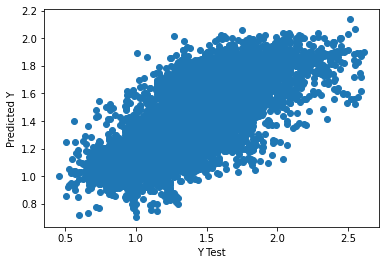

In [64]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [65]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)

In [66]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

77.32161296948918
MAE: 0.11947855029585798
MSE: 0.03306545857988166
RMSE: 0.18183910080035498


In [67]:
model_name.append('Decision Tree Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

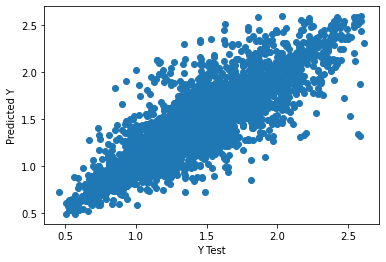

In [68]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [69]:
#RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
y_pred=rdr.predict(x_test)

In [70]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

89.46987590031507
MAE: 0.08635275517751478
MSE: 0.015353092871671598
RMSE: 0.12390759811920977


In [71]:
model_name.append('Random Forest Regressor')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

Text(0, 0.5, 'Predicted Y')

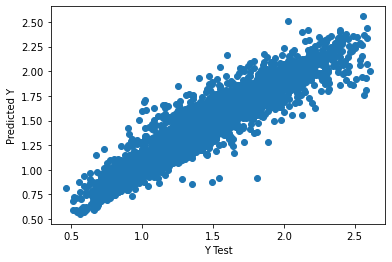

In [72]:
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [73]:
#SVR
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [74]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

73.36657415074157
MAE: 0.14576506128559275
MSE: 0.038831969754912855
RMSE: 0.197058290246599


In [75]:
model_name.append('SVR')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [76]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

In [77]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

59.618044429744984
MAE: 0.1955292148128323
MSE: 0.05887755057211459
RMSE: 0.24264696695428647


In [78]:
model_name.append('ADA Boost')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [79]:
#XGB
import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

In [80]:
r2score=r2_score(y_test,y_pred)*100
print(r2score)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',rmse )

90.1301885655719
MAE: 0.08702350727199804
MSE: 0.014390346224238236
RMSE: 0.11995976919050085


In [81]:
model_name.append('XGBoost')
r2_scores.append(r2score)
rmse_value.append(rmse)

import pandas as pd
Regression_Scores = pd.DataFrame()
Regression_Scores['Model Name']= model_name
Regression_Scores['r2 Score']=r2_scores
Regression_Scores['RMSE ']=rmse_value

In [82]:
Regression_Scores

,Model Name,r2 Score,RMSE
0,Linear Regression,53.742125,0.259701
1,Decision Tree Regressor,77.321613,0.181839
2,Random Forest Regressor,89.469876,0.123908
3,SVR,73.366574,0.197058
4,ADA Boost,59.618044,0.242647
5,XGBoost,90.130189,0.119960


In [83]:
#R2 Score is the highest (90.13) and RMSE value is the loweest (0.11) for XGBoost Regressor, hence we will continue with XGB, but let's check the cv score first

,Y Test,Y Pred
11291,1.45,1.617833
8454,0.83,0.851072
5803,1.21,1.166563
17266,1.58,1.728781
15571,1.84,1.705332


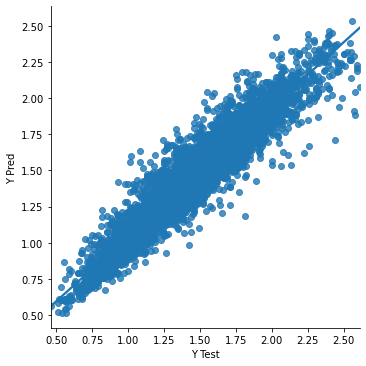

In [84]:
data = pd.DataFrame({'Y Test':y_test , 'Y Pred':y_pred},columns=['Y Test','Y Pred'])
sns.lmplot(x='Y Test',y='Y Pred',data=data,palette='rainbow')
data.head()

In [85]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X,y,cv=5)
print("Cross validation score of Linear Regression Model", np.abs(scr.mean()))
scr1 = cross_val_score(ada,X,y,cv=5)
print("Cross validation score of Ada Boost Regressor Model", np.abs(scr1.mean()))
scr2 = cross_val_score(rdr,X,y,cv=5)
print("Cross validation score of Random Forest Regressor Model", np.abs(scr2.mean()))
scr3 = cross_val_score(xgb,X,y,cv=5)
print("Cross validation score of XGBoost Regression Model", np.abs(scr3.mean()))
scr4 = cross_val_score(dtr,X,y,cv=5)
print("Cross validation score of Decision Tree Model", np.abs(scr4.mean()))
scr5 = cross_val_score(svr,X,y,cv=5)
print("Cross validation score of SVR Model", np.abs(scr5.mean()))

Cross validation score of Linear Regression Model 0.2285063127255218
Cross validation score of Ada Boost Regressor Model 0.15176849673204112
Cross validation score of Random Forest Regressor Model 0.4472989294618405
Cross validation score of XGBoost Regression Model 0.4695078367309778
Cross validation score of Decision Tree Model 0.04382476232424541
Cross validation score of SVR Model 0.2400609564869783


In [86]:
#The cv score (0.46) also states XGBoost as the best regression model. Hence, we will now apply lasso regularisation to remove multicolinearity as well.

# Removing multicollinearity ussing L1 Regularisation

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(X,y)
print(m1.best_params_)

{'alpha': 0.001}


In [89]:
m1=Lasso(alpha=0.001)
m1.fit(X,y)

Lasso(alpha=0.001)

In [90]:
importance = np.abs(m1.coef_)

In [91]:
dfcolumns = pd.DataFrame(X.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns = ['Features','Coefficients']  #naming the dataframe columns
featureScores.sort_values(by=['Coefficients'],ascending=False)

,Features,Coefficients
4,TotalBags,0.249136
2,f4225,0.231775
0,TotalVolume,0.218274
8,type,0.177650
5,SmallBags,0.168636
10,Time,0.100584
6,Large Bags,0.048013
3,f4770,0.031804
9,region,0.011954
7,XLargeBags,0.000738


In [92]:
#We shall drop column = f4046 & XLargeBags as they are highly correlated and this will solve the problem of multicollinearirty
#As f4046 has 0 coefficient and XLargeBags has 0.002 coefficient, hence they are least important features

In [93]:
X.drop(columns =['f4046', 'XLargeBags'],inplace=True)

In [94]:
X.columns

Index(['TotalVolume', 'f4225', 'f4770', 'TotalBags', 'SmallBags', 'Large Bags',
       'type', 'region', 'Time'],
      dtype='object')

In [95]:
#We apply Hperparameter tuning on Xtreme Gradient Boost as it is giving the best performance for our dataset

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
#Train Test Split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [97]:
params={
 "learning_rate"    : [0.001,0.05, 0.10, ] ,
 "max_depth"        : [ 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [98]:
g=RandomizedSearchCV(XGBRegressor(verbosity=0),params,cv=10)

In [99]:
g.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.001, 0.05, 0.1],
                                        'max_depth': [4, 5, 6, 8, 10, 12, 15],
                                        'min_child_weight': [1, 3, 5, 7]})

In [100]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
{'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
0.9058027632369823


In [101]:
model=XGBRegressor(colsample_bytree=0.5,gamma=0.0,learning_rate=0.1,max_depth=10,min_child_weight=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=cross_val_score(model,X,y,cv=10)

In [102]:
print('Mean Absolute Error is',np.round(mean_absolute_error(y_pred,y_test),4))
print('Mean Squared Error is',np.round(mean_squared_error(y_pred,y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(y_pred,y_test)),4))
print('R2 Score is',np.round(r2_score(y_pred,y_test),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))

Mean Absolute Error is 0.0841
Mean Squared Error is 0.0135
Root Mean Squared Error is 0.1163
R2 Score is 88.55
Mean of cross validaton Score is 57.9986


Text(0.5, 1.0, 'XGBRegressor')

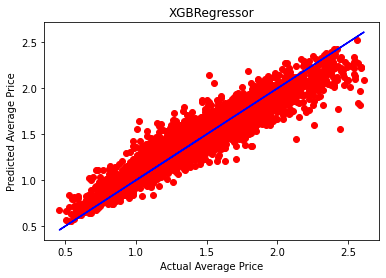

In [103]:
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('XGBRegressor')

# Saving the Model

In [104]:
import joblib
joblib.dump(model,'avacadoprice.obj')

['avacadoprice.obj']

In [105]:
#now we shall move onto the classification problem

# CLASSIFICATION TASK = FIND REGION

In [106]:
df.head()

,AveragePrice,TotalVolume,f4046,f4225,f4770,TotalBags,SmallBags,Large Bags,XLargeBags,type,region,Time
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,752
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,745
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,738
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,731
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,724


# DIVIDE DATA INTO FEATURES & LABEL (CLASSFICATION)

In [107]:
#diving the columns in feature and label from the backup dataset df3
X = df3.drop(columns=['region'])
y = df3['region']

In [108]:
#FEATURE SELECTION

#Using SelectKBest feature seleciton Method
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(f_classif, k=9)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores],axis=1)
#name output columns
feature_scores.columns = ['Feaure_Name','Score']
#print 17 best features
print(feature_scores.nlargest(11,'Score'))

     Feaure_Name       Score
1    TotalVolume  319.035278
3          f4225  308.834412
6      SmallBags  298.998145
2          f4046  295.483768
5      TotalBags  295.176645
7     Large Bags  254.735012
4          f4770  208.050643
8     XLargeBags  123.297554
0   AveragePrice   69.383811
9           type    0.000496
10          Time    0.000065


In [109]:
#The vision behind choosing selectKBest feature selection was to remove highly correlated features, but type and time both are not correlated much with any other feature.
#Rest of all the features seem to be highly important, hence we will continue.

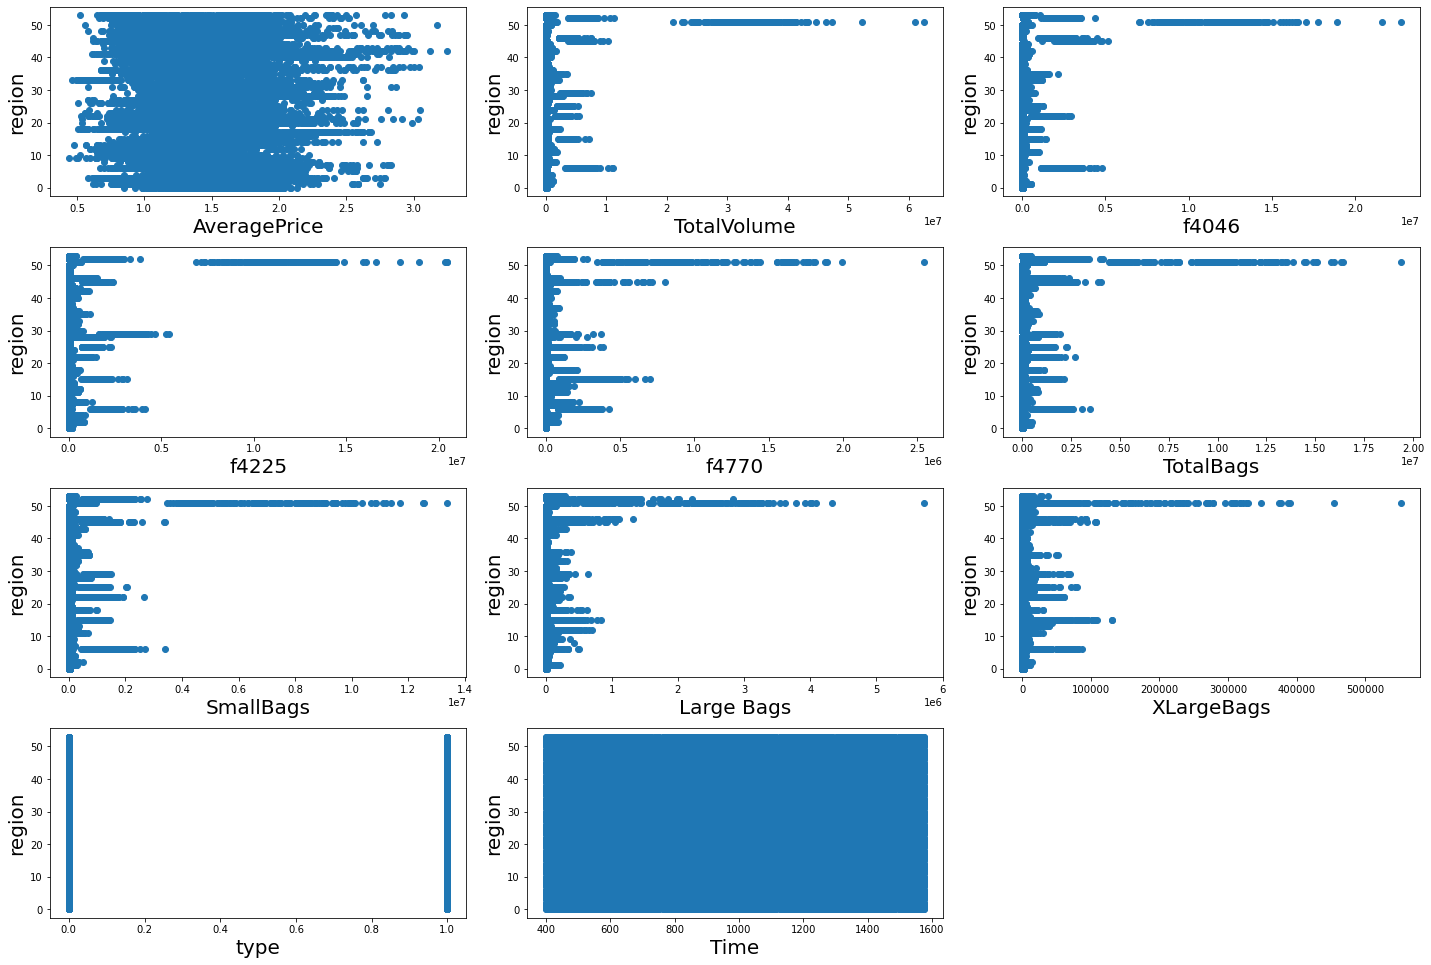

In [110]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('region', fontsize=20)
    plotnumber+=1
plt.tight_layout()

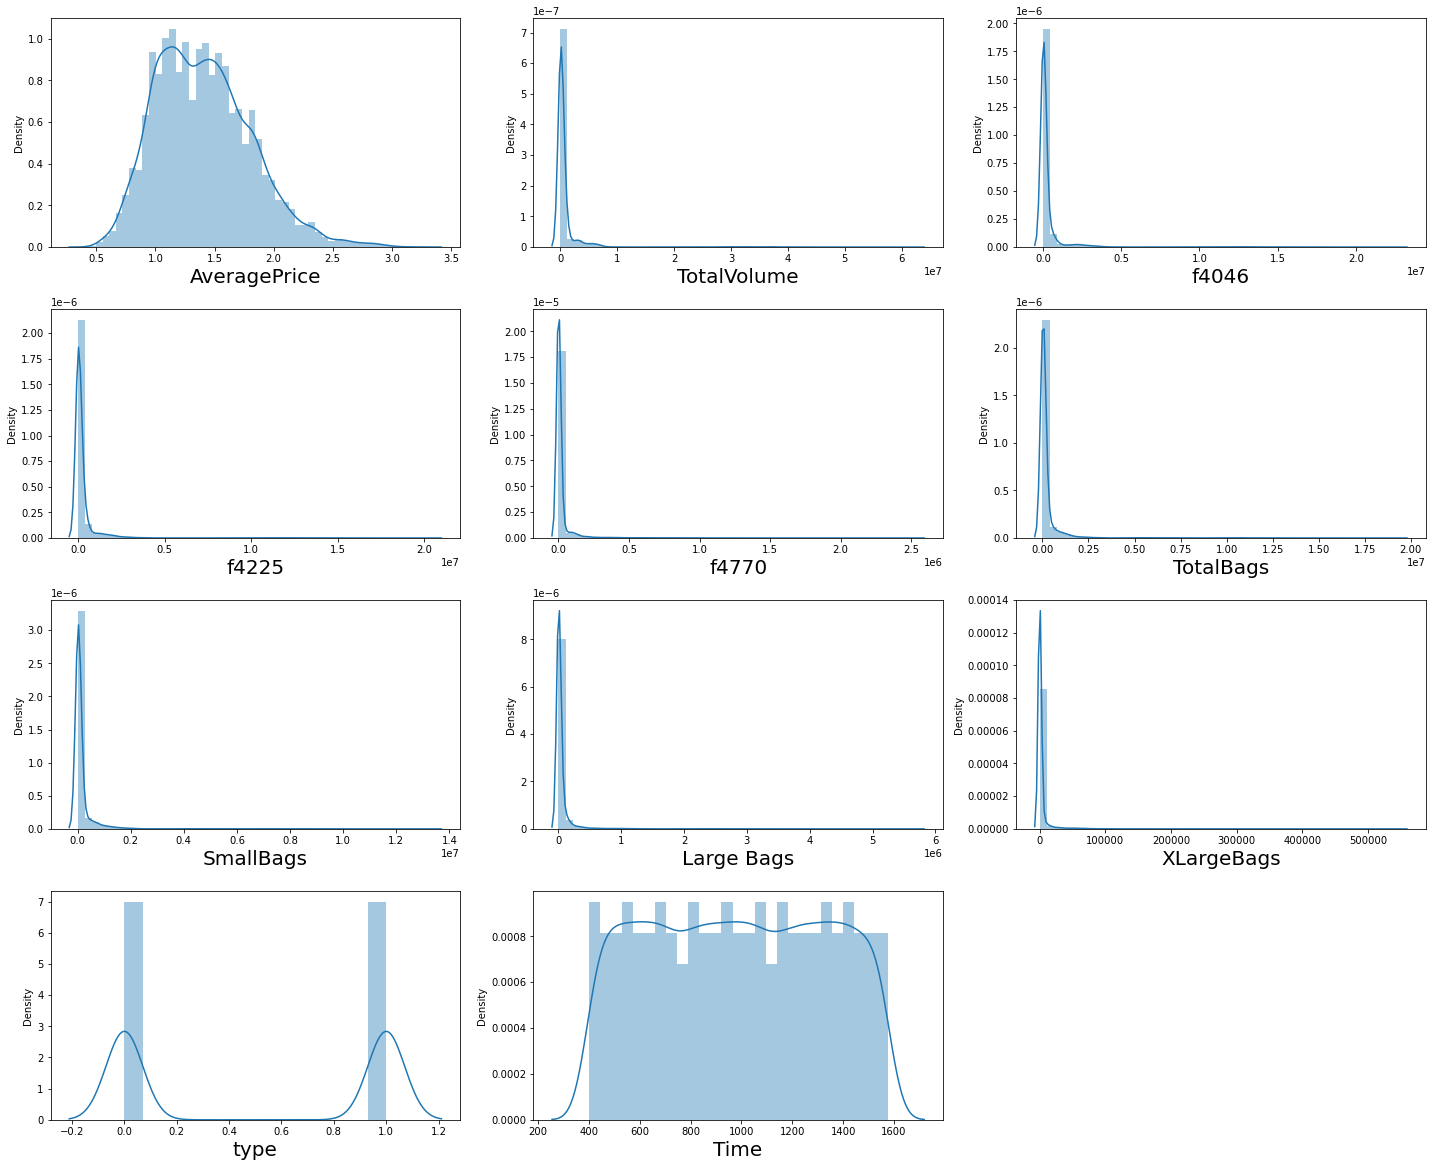

In [111]:
#Visualise the distribution of data in the feature columns(DISTRIBUTION PLOT)

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [112]:
#As we can see there is skewness in our dataset, lets try to remove skewness

In [113]:
#Checking skewness of the features
df3.skew().sort_values(ascending=False)

XLargeBags      13.139751
f4770           10.159396
Large Bags       9.796455
TotalBags        9.756072
SmallBags        9.540660
TotalVolume      9.007687
f4225            8.942466
f4046            8.648220
AveragePrice     0.580303
Time             0.003328
type             0.000329
region           0.000030
dtype: float64

In [114]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
df3_new = power_transform(df3)
df3=pd.DataFrame(df2_new,columns=df3.columns)
df3.skew().sort_values(ascending=False) #validating that the skewness is removed

XLargeBags      0.795095
AveragePrice    0.395941
f4770           0.013167
type            0.010098
TotalBags      -0.012773
TotalVolume    -0.034321
SmallBags      -0.061312
f4046          -0.067598
f4225          -0.080231
Time           -0.103789
Large Bags     -0.125273
region         -0.251530
dtype: float64

In [115]:
#As we can see most of the skewness in the features have been removed

In [116]:
df3['region'] = df['region'] #giving back the original values of target column
X = df3.drop(columns=['region'])
y = df3['region']

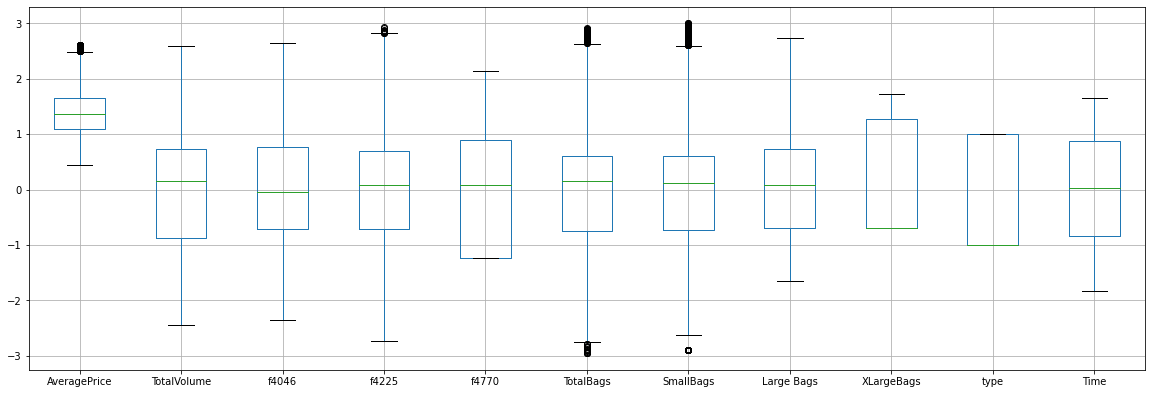

In [117]:
##Visualizing the outliers using BOXPLOT
X.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [118]:
#There are outliers in AveragePrice (higher quantile) , TotalBags (Both) , SmallBags (Higher Quantile)
#We will use z score method to remove these outliers

In [119]:
# to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df3))
z.shape

threshold=3
print(np.where(z>3))

df3_new=df3[(z<3).all(axis=1)]

df3_new.shape

(array([ 5459,  5460,  5461,  5470,  5471,  5472,  5474,  5475,  5476,
        5477,  5478,  5479,  5480,  5482,  8293,  8294,  8295,  8298,
        8299, 10264, 11242, 11244, 11247, 11248, 11257, 12150, 12718,
       13904, 14000, 14001, 14567, 14674, 14676, 14677, 14678, 14889,
       14890, 14999, 15516, 15519, 15524, 15528, 15658, 15659, 15713,
       15894, 16496, 16556, 16750, 16803, 16809, 16811, 16812, 16813,
       16815, 16817, 16818, 16821, 16834, 16835, 16836, 16837, 17041,
       17209, 17210], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 0, 5,
       5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64))


(17960, 12)

In [121]:
#loss of data

print(((18249-17960)/18249)*100)

1.583648419091457


In [122]:
#We have incurred a loss of 1.5% of the data.

# Dividing into Feature & Label (Classification)

In [124]:
X = df3.drop(columns=['region'])
y = df3['region']

0.0     338
5.0     338
2.0     338
39.0    338
34.0    338
46.0    338
15.0    338
6.0     338
18.0    338
26.0    338
22.0    338
9.0     338
49.0    338
11.0    338
10.0    338
32.0    338
12.0    338
13.0    338
44.0    338
27.0    338
45.0    338
23.0    338
38.0    338
19.0    338
52.0    338
29.0    338
25.0    338
4.0     338
35.0    338
8.0     338
16.0    338
30.0    338
20.0    337
28.0    337
50.0    336
41.0    336
33.0    336
1.0     336
40.0    336
31.0    335
14.0    335
24.0    334
21.0    333
48.0    332
53.0    332
7.0     332
17.0    331
36.0    329
3.0     328
37.0    328
43.0    324
47.0    322
42.0    290
51.0    270
Name: region, dtype: int64


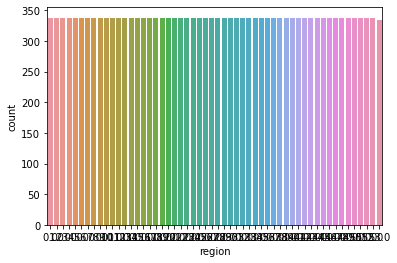

In [125]:
#count of each class (Attrition(1) = 237, NoAttrition(0)=1233)
ax=sns.countplot(x="region", data=df)
print(df3['region'].value_counts())

In [126]:
#post outlier removal still the value count of all the classes is almost same, except region no. 51 which is 217.
#since there are 338 values for each region we will move along with the situation as it will generate more outliers otherwise.

# APPLYING CLASSIFICATION MODELS & FINDING BEST FIT MODEL

In [128]:
#Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [129]:
#Finding best random_state
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

maxAccu=0 #maximum accuracy
maxRS=0 #best random state value for which max accuracy is acheived 
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State", maxRS)

Best accuracy is 0.5532544378698225 on Random State 111


In [130]:
#CREATING TRAIN-TEST SPLIT
x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=111)

In [131]:
#LOGISTIC REGRESSION
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 55.325443786982255
[[60  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  1]
 [ 0  0 65 ...  0  0  8]
 ...
 [ 0  0  0 ... 65  2  0]
 [ 0  0  0 ...  1 96  0]
 [ 0  5  0 ...  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.67      0.66      0.66        91
         1.0       0.20      0.33      0.25       101
         2.0       0.69      0.66      0.68        98
         3.0       0.57      0.42      0.48        91
         4.0       0.55      0.53      0.54       104
         5.0       0.62      0.53      0.57        94
         6.0       0.84      0.94      0.89       111
         7.0       0.65      0.72      0.68       104
         8.0       0.71      0.79      0.75       116
         9.0       0.52      0.78      0.62       104
        10.0       0.63      0.47      0.54       110
        11.0       0.61      0.67      0.64       103
        12.0       0.45      0.51      0.48       107
        13.0       0.38      0.25      0.30       105
     

In [132]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_dt)*100)
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Accuracy 81.5828402366864
[[ 76   0   0 ...   0   0   0]
 [  0  76   0 ...   0   0   0]
 [  0   0  90 ...   0   0   0]
 ...
 [  0   0   0 ...  65   1   0]
 [  0   1   0 ...   0 100   0]
 [  0   1   0 ...   0   0  65]]
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        91
         1.0       0.78      0.75      0.77       101
         2.0       0.94      0.92      0.93        98
         3.0       0.85      0.78      0.81        91
         4.0       0.87      0.87      0.87       104
         5.0       0.71      0.71      0.71        94
         6.0       0.95      0.94      0.95       111
         7.0       0.83      0.82      0.82       104
         8.0       0.93      0.96      0.94       116
         9.0       0.72      0.79      0.75       104
        10.0       0.78      0.67      0.72       110
        11.0       0.86      0.85      0.86       103
        12.0       0.89      0.84      0.87       107
        13.0       0.79  

In [133]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_rf)*100)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy 90.97633136094674
[[ 88   0   0 ...   0   0   0]
 [  0  92   0 ...   0   0   0]
 [  0   0  96 ...   0   0   0]
 ...
 [  0   0   0 ...  67   0   0]
 [  0   0   0 ...   0 109   0]
 [  0   1   0 ...   0   0  75]]
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92        91
         1.0       0.81      0.91      0.86       101
         2.0       0.97      0.98      0.97        98
         3.0       0.93      0.88      0.90        91
         4.0       0.92      0.97      0.94       104
         5.0       0.87      0.79      0.83        94
         6.0       0.99      0.99      0.99       111
         7.0       0.90      0.91      0.91       104
         8.0       0.96      0.99      0.97       116
         9.0       0.89      0.88      0.89       104
        10.0       0.90      0.91      0.90       110
        11.0       0.93      0.92      0.93       103
        12.0       0.96      0.96      0.96       107
        13.0       0.89 

In [134]:
#SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
print("Accuracy", accuracy_score(y_test,y_pred_svc)*100)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy 81.02810650887574
[[ 86   0   0 ...   0   0   0]
 [  0  54   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ...  67   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   1   0 ...   0   0  62]]
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.84        91
         1.0       0.49      0.53      0.51       101
         2.0       0.97      0.97      0.97        98
         3.0       0.90      0.78      0.84        91
         4.0       0.92      0.88      0.90       104
         5.0       0.84      0.72      0.78        94
         6.0       0.97      0.99      0.98       111
         7.0       0.80      0.78      0.79       104
         8.0       0.93      0.98      0.96       116
         9.0       0.65      0.84      0.73       104
        10.0       0.67      0.76      0.71       110
        11.0       0.88      0.83      0.86       103
        12.0       0.94      0.95      0.95       107
        13.0       0.62 

In [135]:
#KNN CLASSIFIER
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
cfm=confusion_matrix(y_test,y_pred_knn)
cr=classification_report(y_test,y_pred_knn,digits=2)
print("Accuracy", accuracy_score(y_test,y_pred_knn)*100)
print(cfm)
print(cr)

Accuracy 86.03920118343196
[[ 88   0   0 ...   0   0   0]
 [  0  79   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ...  67   0   0]
 [  0   0   0 ...   0 107   0]
 [  0   3   0 ...   0   0  72]]
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89        91
         1.0       0.65      0.78      0.71       101
         2.0       0.97      0.97      0.97        98
         3.0       0.85      0.84      0.84        91
         4.0       0.92      0.92      0.92       104
         5.0       0.83      0.85      0.84        94
         6.0       0.97      0.96      0.97       111
         7.0       0.77      0.86      0.81       104
         8.0       0.91      0.97      0.94       116
         9.0       0.75      0.81      0.78       104
        10.0       0.72      0.79      0.76       110
        11.0       0.92      0.94      0.93       103
        12.0       0.97      0.94      0.96       107
        13.0       0.74 

SUMMARY:

- LOGISTIC REGRESSION:  ACCURACY SCORE=  55.32 
- DECISION TREE CLASSIFIER: ACCURACY SCORE= 81.58
- RANDOM FOREST CLASSIFIER: ACCURACY SCORE=  90.97
- SVC: ACCURACY SCORE=  81.02
- KNN : ACCURACY SCORE = 86.03

In [136]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,X,y,cv=5)
print("Cross validation score of Logistic Regression Model", scr.mean())
scr2 = cross_val_score(rf,X,y,cv=5)
print("Cross validation score of Random Forest Model", scr2.mean())
scr3 = cross_val_score(dt,X,y,cv=5)
print("Cross validation score of Decision Tree Model", scr3.mean())
scr4 = cross_val_score(svc,X,y,cv=5)
print("Cross validation score of SVC Model", scr4.mean())
scr5 = cross_val_score(knn,X,y,cv=5)
print("Cross validation score of KNN Model", scr5.mean())

Cross validation score of Logistic Regression Model 0.3999445214979196
Cross validation score of Random Forest Model 0.691373092926491
Cross validation score of Decision Tree Model 0.5681553398058252
Cross validation score of SVC Model 0.6511511789181692
Cross validation score of KNN Model 0.6005547850208044


# Concluding Remarks

In [137]:
#RandomForestClassifier has an accuracy score of 90.97 and cv score of 0.69 => RF is the best model here
#Lets try to improve the accuracy score by using GridSearchCV over all the models

In [138]:
#Let's tune the parameter using GridSearchCV
#RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=41)
clf= RandomForestClassifier()
params = { 'n_estimators': [13,15],
          'criterion': ['entropy', 'gini'],
          'max_depth': [10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]
         }
grid=GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_params=>', grid.best_params_)
clf=grid.best_estimator_
clf.fit(x_train,y_train)
y_pred_gscv=clf.predict(x_test)
rf_conf_mat=confusion_matrix(y_test,y_pred_gscv)
print('\n Conf Mat =>''\n', rf_conf_mat)
print('\n' ' Accuracy rf Normal =>', accuracy_score(y_test,y_pred_gscv))

report = classification_report(y_test,y_pred_gscv)
print(report)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}

 Conf Mat =>
 [[ 90   0   0 ...   0   0   0]
 [  0  88   0 ...   0   0   0]
 [  0   0 101 ...   0   0   0]
 ...
 [  0   0   0 ...  93   0   0]
 [  0   0   0 ...   0 111   0]
 [  0   1   2 ...   0   0  75]]

 Accuracy rf Normal => 0.8572485207100592
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       110
         1.0       0.80      0.81      0.80       109
         2.0       0.91      0.94      0.93       107
         3.0       0.90      0.79      0.84        97
         4.0       0.92      0.84      0.88       111
         5.0       0.87      0.78      0.82       101
         6.0       0.95      0.96      0.96       105
         7.0       0.84      0.88      0.86        99
         8.0       0.96      0.96      0.96        92
         9.0       0.83      0.87      0.85        99
        10.0       0.71      0.

# Saving the Model

In [139]:
import joblib
joblib.dump(clf,'avacadoregion.obj')

['avacadoregion.obj']